<a href="https://colab.research.google.com/github/Guna-Tamizhan/Machine-learning-/blob/main/ML_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.DataFrame({'month':[1,2,3,4,5,6,7],'sales':[100,200,300,450,480,600,700]})
df

,month,sales
0,1,100
1,2,200
2,3,300
3,4,450
4,5,480
5,6,600
6,7,700


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= df['month']
y = df['sales']

In [ ]:
print(x)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
Name: month, dtype: int64


In [ ]:
x = x.values.reshape(-1,1)

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
print(x,y)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]] [[100]
 [200]
 [300]
 [450]
 [480]
 [600]
 [700]]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
print(x.shape,y.shape)

(7, 1) (7, 1)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5, 1)
(2, 1)
(5, 1)
(2, 1)


In [ ]:
x_train

array([[4],
       [3],
       [7],
       [6],
       [1]])

In [ ]:
y_train

array([[450],
       [300],
       [700],
       [600],
       [100]])

In [ ]:
print(x_test,y_test)

[[5]
 [2]] [[480]
 [200]]


In [ ]:
lr = LinearRegression()
lr

LinearRegression()

In [ ]:
model = lr.fit(x_train,y_train)
model

LinearRegression()

In [ ]:
y_pred =model.predict(x_test)
y_pred

array([[509.64912281],
       [210.96491228]])

In [ ]:
y_test

array([[480],
       [200]])

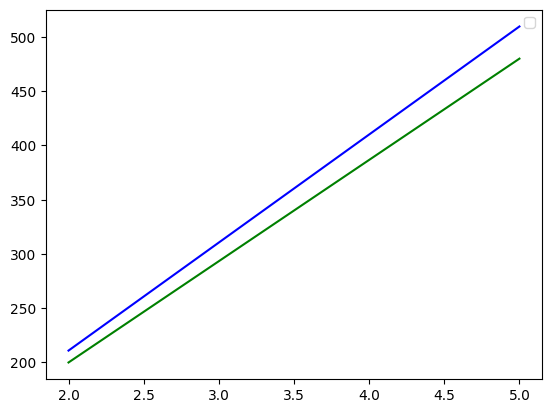

In [ ]:
plt.plot(x_test,y_test,color = 'green')
plt.plot(x_test,y_pred,color = 'blue')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
mean_squared_error(y_test,y_pred)

499.6498922745454

In [ ]:
r2_score(y_test,y_pred)

0.9745076585574212

In [ ]:
mean_absolute_error(y_test,y_pred)

20.30701754385963

In [ ]:
model.predict(np.array(12).reshape(-1,1))

array([[1206.57894737]])

#Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
al=pd.read_csv('/content/Algerian_forest_fires_cleaned_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Algerian_forest_fires_cleaned_dataset.csv'

In [ ]:
al.head()

In [ ]:
x=al.drop(columns='Classes')
y=al['Classes']

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le= LabelEncoder()
le

LabelEncoder()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter={
  'criterion' : ['gini', 'entropy', 'log_loss'],
  'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
  'max_features' : ["sqrt", "log2"],
  'splitter' : ["best", "random"]




}

In [ ]:
dt = DecisionTreeClassifier()
gsv = GridSearchCV (dt, parameter, scoring = "accuracy")

In [ ]:
gsv.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
gsv.best_params

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier


parameter={
'criterion' : ['gini', 'entropy', 'log_loss'],
'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
'max_features' : ["sqrt", "log2"],
'splitter' : ["best", "random"]
}

dt = DecisionTreeClassifier()
# Use KFold with 3 splits
kf = KFold(n_splits=3)
gsv = GridSearchCV (dt, parameter, scoring = "accuracy", cv=kf)

gsv.fit(x_train,y_train)

In [ ]:
y_pred = gsv.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_test,y_pred)

#**SVR**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
ds = sns.load_dataset('diamonds')
ds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
ds.shape

(53940, 10)

In [ ]:
ds['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']])

In [ ]:
ds['cut'] = oe.fit_transform(ds[['cut']])

In [ ]:
ds['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [ ]:
oe = OrdinalEncoder(categories = [['VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1','IF']])

In [ ]:
ds['clarity'] = oe.fit_transform(ds[['clarity']])

In [ ]:
ds['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [ ]:
clr={'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}

In [ ]:
ds['color'] = ds['color'].replace(clr)

In [ ]:
ds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0.0,1,5.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1.0,1,4.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3.0,1,2.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1.0,5,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3.0,6,5.0,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
X= ds.drop('price', axis=1)
y = ds['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()

In [ ]:
from sklearn.model_selection import GridSearchCV

Parameters = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],'c' : [1,2,3,4,5,6,7],'epsilon' : [0.1,0.2,0.3,0.4]}

In [ ]:
gsc = GridSearchCV(svr,Parameters,scoring = )

In [ ]:
import matplotlib.pyplot as plt
cut_colors = {'Fair': 'red','Good': 'blue','Very Good': 'green','Premium': 'orange','Ideal': 'purple'}
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    filtered_df['carat'],
    filtered_df['price'],
    c=filtered_df['cut'].map(cut_colors),
    alpha=0.7,
    edgecolors='w',
    s=50
)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cut_colors[cut], markersize=10, label=cut) for cut in cut_colors]
plt.legend(handles=handles, title='Cut', title_fontsize='13', fontsize='11')
plt.title('Price vs Carat for Diamonds with Clarity "SI2" and Color "E"', fontsize=16)
plt.xlabel('Carat', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


NameError: name 'filtered_df' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/cars.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats
df = pd.read_csv('/content/cars.csv')
print("Data types of all columns:")
print(df.dtypes)
missing_values = df.isna().sum()
print("\nNumber of missing values in each column:")
print(missing_values)
df = df[df['horsepower']!='?']
df['horsepower'] = df['horsepower'].astype('int64')
df['price'] = df['price'].astype(float)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)
description = df.describe(include='all')
print("\nDescription of the data:")
print(description)
def remove_outliers_iqr(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return df
df = remove_outliers_iqr(df)
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])
print("\nFinal DataFrame:")
print(df.head())


Data types of all columns:
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

Number of missing values in each column:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Description of the data:
         symboling normalized-losses    make fuel-type body-style  \
count   203.000000           

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [ ]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [ ]:

df = df[df['horsepower']!='?']

#**Adaboost,Gradient Boost ,XGboost Implementation**


In [ ]:
!pip install xgboost

In [ ]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples = 1000,n_features = 4,n_informative = 2,n_redundant = 0,random_state = 42,shuffle = False)

In [ ]:
x

array([[-1.0504776 , -1.32356795, -1.60755986, -0.76272478],
       [-1.58083381, -2.74710392, -0.76914235, -0.9399031 ],
       [-0.88570394, -0.61460004,  0.82947484, -0.19382614],
       ...,
       [ 0.24436244,  0.23144194, -1.36685836,  0.59256727],
       [ 1.77766671,  1.7423097 , -2.70439163, -0.62988455],
       [ 1.57402416,  1.56875518, -0.48827384,  0.63332683]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

In [ ]:
#AdBoostClassifier

In [ ]:
adc = AdaBoostClassifier()

In [ ]:
adc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [ ]:
pread_1 = adc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
print(confusion_matrix(y_test,pread_1))

[[113  14]
 [ 15 108]]


In [ ]:
accuracy_score(y_test,pread_1)

0.884

In [ ]:
print(classification_report(y_test,pread_1))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       127
           1       0.89      0.88      0.88       123

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



In [ ]:
#GradientBoostingClassifier

In [ ]:
gdc = GradientBoostingClassifier()

In [ ]:
gdc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
pread_2 = gdc.predict (x_test)

In [ ]:
print(confusion_matrix(y_test,pread_1))
print(accuracy_score(y_test,pread_1))
print(classification_report(y_test,pread_1))

[[113  14]
 [ 15 108]]
0.884
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       127
           1       0.89      0.88      0.88       123

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



In [ ]:
#XGB Clasifier

In [ ]:
xgc = xg.XGBClassifier()

In [ ]:
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pread_3 = xgc.predict (x_test)

In [ ]:
print(confusion_matrix(y_test,pread_1))
print(accuracy_score(y_test,pread_1))
print(classification_report(y_test,pread_1))

[[113  14]
 [ 15 108]]
0.884
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       127
           1       0.89      0.88      0.88       123

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



In [ ]:
#Regression

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xb

In [ ]:
abr = AdaBoostRegressor()

In [ ]:
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [ ]:
pread_1 = abr.predict (X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
print(mean_squared_error(y_test,pread_1))
print(r2_score(y_test,pread_1))
print(mean_absolute_error(y_test,pread_1))

99.00279729995835
0.8935844595645999
8.252836841582345


In [ ]:
gbr = GradientBoostingRegressor()

In [ ]:
gbr.fit(x_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [750, 75]